# PISA 2012 
## by Verena Dietrich

PISA 2012 is the programme’s 5th survey. It assessed the competencies of 15-year-olds in reading, mathematics and science (with a focus on mathematics) in 65 countries and economies. In 44 of those countries and economies about 85 000 students also took part in an optional assessment of creative problem solving; and in 18 countries and economies, students were assessed in financial literacy.

Around 510 000 students between the ages of 15 years 3 months and 16 years 2 months participated in PISA 2012 as a whole representing about 28 million 15-year-olds globally." [https://www.oecd.org/pisa/keyfindings/pisa-2012-results.htm, June 2021]


## Preliminary Wrangling

As the first step I gather the data, assess the qulity and clean where it is necessary.

In [10]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype


%matplotlib inline

##### Loading dataset and exploring properties (just for documnentation purpose -  no need for execution).

In [11]:
import zipfile
# Extract all contents from zip file
# Just needed once
with zipfile.ZipFile('pisa2012.csv.zip', 'r') as myzip:
    myzip.extractall()

In [12]:
# Read CSV (comma-separated) file into DataFrame
df = pd.read_csv('pisa2012.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 55: invalid continuation byte

##### Exploring Data (just for documnentation purpose -  no need for execution).

In [4]:
# df.head()

In [5]:
# df.shape

> This dataframe has too many information to handle all information. Let's have a look into the pisadict file wich gives information about the features.

In [6]:
# Find the features of interest in the Pisa dictionary
# df_dict = pd.read_csv('pisadict2012.csv')
# pd.set_option('display.max_rows', df_dict.shape[0]+1)
# print(df_dict)

### Structure of data

> The PISA data frame has 485490 students represented in a row descibed with 636 features represented in a column each.




### Question to I want to ask

That the parents education and the parents involvement/engagement have highly positive impact on the children's success in school is known (https://www.oecd.org/pisa/49012097.pdf). I am wondering how the teacher's relationship influences the children's success.

### Features of interest to support my investigation

Since this are way to much information, I reduced the data frame to a subset df_sub with the following features to answer my question:

- CNT:	Country code 3-character
- STIDSTD:	Student ID
- ST04Q01:	Gender
- PV1MATH:	Plausible value 1 in mathematics
- PV1READ:	Plausible value 1 in reading
- PV1SCIE:	Plausible value 1 in science
- ST86Q01:	Student-Teacher Relation - Get Along with Teachers
- ST86Q02:	Student-Teacher Relation - Teachers Are Interested
- ST86Q03:	Student-Teacher Relation - Teachers Listen to Students
- ST86Q04:	Student-Teacher Relation - Teachers Help Students
- ST86Q05:	Student-Teacher Relation - Teachers Treat Students Fair

For me the most interesting feature is "Student-Teacher Relation" and what infulence the relation has on the scoring in the different subject. Is there a difference for the male and female students?

##### Create and save sub-data-frame for the features I am interested in (just for documnentation purpose -  no need for execution).

In [7]:
# Just Once: Creat data frame with columns of interest
# df_sub = df[['CNT','STIDSTD','ST04Q01','PV1MATH','PV1READ','PV1SCIE','ST86Q01','ST86Q02','ST86Q03','ST86Q04','ST86Q05']]
# df_sub.rename({'CNT':'country','STIDSTD': 'student_ID','ST04Q01':'gender','PV1MATH': 'score_maths','PV1READ': 'score_read','PV1SCIE': 'score_science','ST86Q01': 'relation_GetAlongWithTeachers','ST86Q02': 'relation_TeachersAreInterested','ST86Q03': 'relation_TeachersListenToStudents','ST86Q04': 'realtion_TeachersHelpStudents','ST86Q05': 'relation_TeachersTreatStudentsFair'}, axis='columns', inplace=True)
# df_sub.to_csv('pisa2012_sub.csv', index = False)


##### Load sub-data-frame with the features I am interested in

In [8]:
df_sub = pd.read_csv('pisa2012_sub.csv')

### Data Assessing and Cleaning

In [9]:
df_sub.head()

,country,student_ID,gender,score_maths,score_read,score_science,relation_GetAlongWithTeachers,relation_TeachersAreInterested,relation_TeachersListenToStudents,realtion_TeachersHelpStudents,relation_TeachersTreatStudentsFair
0,Albania,1,Female,406.8469,249.5762,341.7009,Agree,Strongly disagree,Agree,Agree,Disagree
1,Albania,2,Female,486.1427,406.2936,548.9929,NaN,NaN,NaN,NaN,NaN
2,Albania,3,Female,533.2684,401.2100,499.6643,NaN,NaN,NaN,NaN,NaN
3,Albania,4,Female,412.2215,547.3630,438.6796,NaN,NaN,NaN,NaN,NaN
4,Albania,5,Female,381.9209,311.7707,361.5628,Agree,Agree,Agree,Agree,Agree


In [10]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   country                             485490 non-null  object 
 1   student_ID                          485490 non-null  int64  
 2   gender                              485490 non-null  object 
 3   score_maths                         485490 non-null  float64
 4   score_read                          485490 non-null  float64
 5   score_science                       485490 non-null  float64
 6   relation_GetAlongWithTeachers       313223 non-null  object 
 7   relation_TeachersAreInterested      312591 non-null  object 
 8   relation_TeachersListenToStudents   312188 non-null  object 
 9   realtion_TeachersHelpStudents       312294 non-null  object 
 10  relation_TeachersTreatStudentsFair  311904 non-null  object 
dtypes: float64(3), int64(1), o

Since I want to explore the influence of the teacher's realtionship on the student's success, I can only use data with information about the student teacher relation. Every listed student has a gender information.

In [11]:
df_sub = df_sub[df_sub.relation_GetAlongWithTeachers.notnull()]
df_sub = df_sub[df_sub.relation_TeachersAreInterested.notnull()]
df_sub = df_sub[df_sub.relation_TeachersListenToStudents.notnull()]
df_sub = df_sub[df_sub.realtion_TeachersHelpStudents.notnull()]
df_sub = df_sub[df_sub.relation_TeachersTreatStudentsFair.notnull()]

In [12]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309321 entries, 0 to 485488
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   country                             309321 non-null  object 
 1   student_ID                          309321 non-null  int64  
 2   gender                              309321 non-null  object 
 3   score_maths                         309321 non-null  float64
 4   score_read                          309321 non-null  float64
 5   score_science                       309321 non-null  float64
 6   relation_GetAlongWithTeachers       309321 non-null  object 
 7   relation_TeachersAreInterested      309321 non-null  object 
 8   relation_TeachersListenToStudents   309321 non-null  object 
 9   realtion_TeachersHelpStudents       309321 non-null  object 
 10  relation_TeachersTreatStudentsFair  309321 non-null  object 
dtypes: float64(3), int64(1), o

> The data frame is still sufficent large with 309 321 students.

##### For cleaning change the data type for the relational description to categorical.

In [13]:
rating = CategoricalDtype(categories=['Strongly agree', 'Agree','Disagree', 'Strongly disagree'], ordered=True)
#df_1['Status'] = df_1['Status'].astype(status_type)
df_sub.relation_GetAlongWithTeachers = df_sub.relation_GetAlongWithTeachers.astype(rating)
df_sub.relation_TeachersAreInterested = df_sub.relation_TeachersAreInterested.astype(rating)
df_sub.relation_TeachersListenToStudents = df_sub.relation_TeachersListenToStudents.astype(rating)
df_sub.realtion_TeachersHelpStudents = df_sub.realtion_TeachersHelpStudents.astype(rating)
df_sub.relation_TeachersTreatStudentsFair = df_sub.relation_TeachersTreatStudentsFair.astype(rating)

In [14]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309321 entries, 0 to 485488
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   country                             309321 non-null  object  
 1   student_ID                          309321 non-null  int64   
 2   gender                              309321 non-null  object  
 3   score_maths                         309321 non-null  float64 
 4   score_read                          309321 non-null  float64 
 5   score_science                       309321 non-null  float64 
 6   relation_GetAlongWithTeachers       309321 non-null  category
 7   relation_TeachersAreInterested      309321 non-null  category
 8   relation_TeachersListenToStudents   309321 non-null  category
 9   realtion_TeachersHelpStudents       309321 non-null  category
 10  relation_TeachersTreatStudentsFair  309321 non-null  category
dtypes: category(5

In [15]:
df_sub.duplicated().sum()

0

>There are no duplicated students in the data.

In [16]:
df_sub.describe()

,student_ID,score_maths,score_read,score_science
count,309321.000000,309321.000000,309321.000000,309321.000000
mean,6166.998616,473.189040,476.154273,479.549717
std,6772.441908,101.720812,99.931083,99.055466
min,1.000000,41.914600,0.083400,6.844500
25%,1815.000000,399.758500,408.973700,409.679200
50%,3749.000000,469.551300,479.052400,479.149600
75%,7506.000000,543.394600,546.828100,549.925400
max,33806.000000,962.229300,878.753200,845.524100


The data set looks pretty clean. Let's start with the visual exploration

## Univariate Exploration

#### How are the different countries represented in the data?

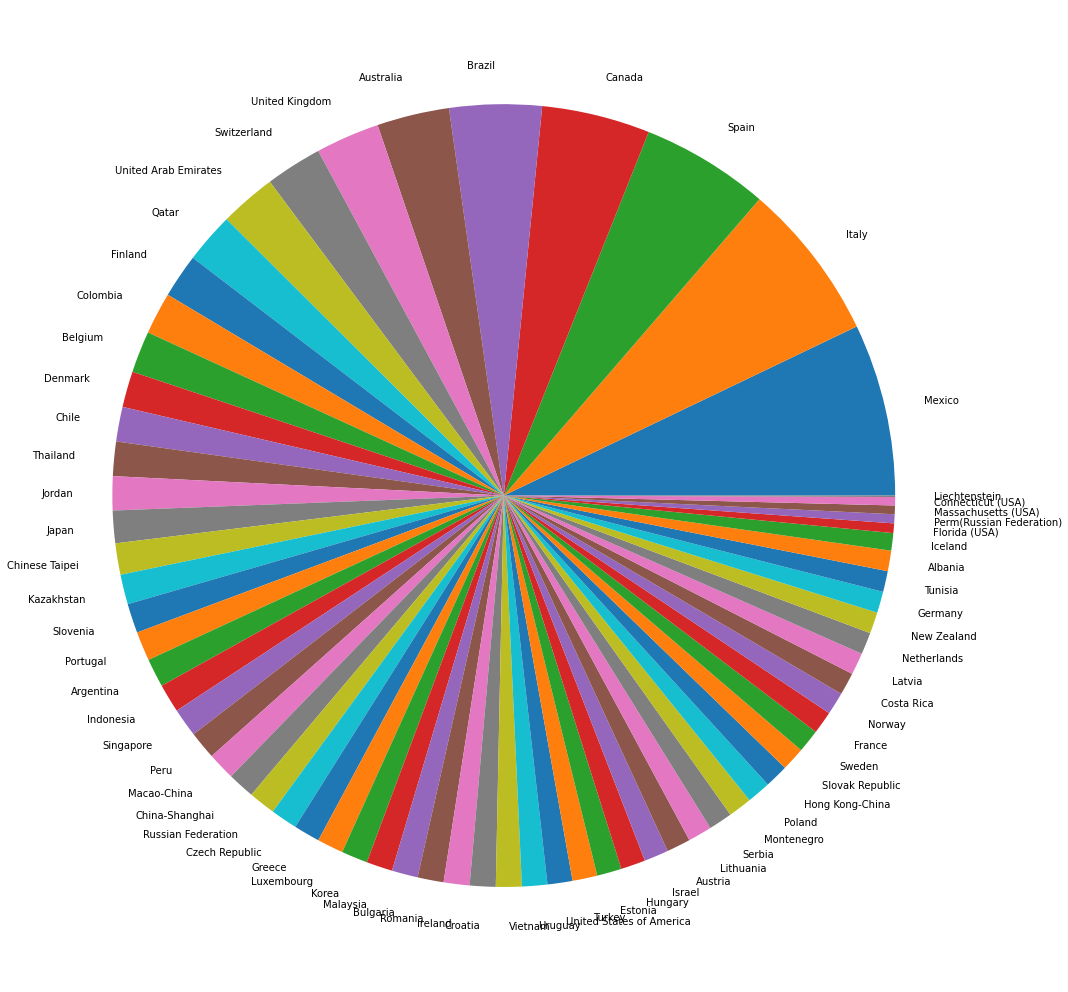

In [17]:
#Country
plt.figure(figsize = [18,18])
country_counts = df_sub.country.value_counts()
plt.pie(country_counts, labels = country_counts.index);

In [18]:
country_counts.index

Index(['Mexico', 'Italy', 'Spain', 'Canada', 'Brazil', 'Australia',
       'United Kingdom', 'Switzerland', 'United Arab Emirates', 'Qatar',
       'Finland', 'Colombia', 'Belgium', 'Denmark', 'Chile', 'Thailand',
       'Jordan', 'Japan', 'Chinese Taipei', 'Kazakhstan', 'Slovenia',
       'Portugal', 'Argentina', 'Indonesia', 'Singapore', 'Peru',
       'Macao-China', 'China-Shanghai', 'Russian Federation', 'Czech Republic',
       'Greece', 'Luxembourg', 'Korea', 'Malaysia', 'Bulgaria', 'Romania',
       'Ireland', 'Croatia', 'Vietnam', 'Uruguay', 'United States of America',
       'Turkey', 'Estonia', 'Hungary', 'Israel', 'Austria', 'Lithuania',
       'Serbia', 'Montenegro', 'Poland', 'Hong Kong-China', 'Slovak Republic',
       'Sweden', 'France', 'Norway', 'Costa Rica', 'Latvia', 'Netherlands',
       'New Zealand', 'Germany', 'Tunisia', 'Albania', 'Iceland',
       'Florida (USA)', 'Perm(Russian Federation)', 'Massachusetts (USA)',
       'Connecticut (USA)', 'Liechtenstein'],
 

This is a wide representation of different countries with a sligh overrepresentation of Canada, Spain, Mexica and Italiy. The states Florida, Massachusetts and Connecticut are seperatly from United States of America. Russion Federation and Perm(Russian Federation) are probably the same. Since I do not plan to split my observations into different countries, I do not see any need to improve the data on county. I consider this as a good representation over different countries that allows good observations independet from countries.

#### How are male and female students represented?

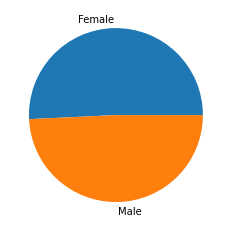

In [19]:
# Gender
gender_counts = df_sub.gender.value_counts()
plt.pie(gender_counts, labels = gender_counts.index);

> The gender looks pretty equally disributed. There are just slightly more female students than male students. I accepts this as a marginal fact.

#### How are the scores in maths, reading and science distributed?

C:\Users\Verena\Anaconda3\envs\Udecity\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Verena\Anaconda3\envs\Udecity\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Verena\Anaconda3\envs\Udecity\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

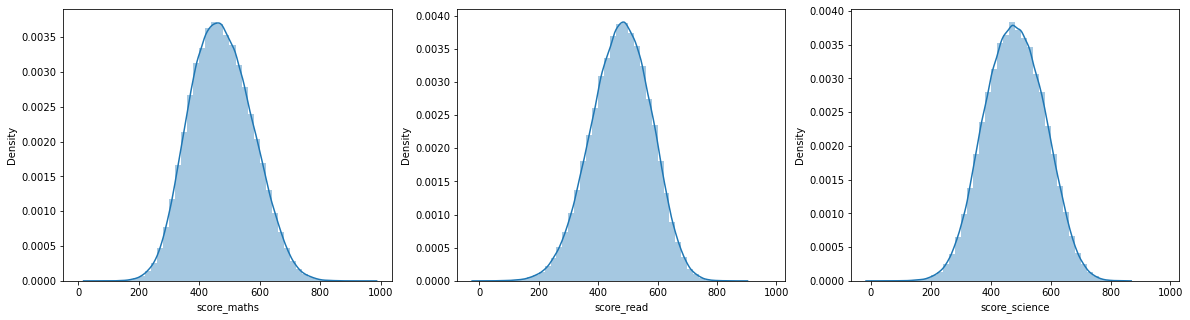

In [20]:
# Distribution of the scores in teh different subjects
bins = np.arange(0,1000,20)
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
sb.distplot(df_sub['score_maths'], bins = bins);
plt.subplot(1,3,2)
sb.distplot(df_sub['score_read'], bins = bins);
plt.subplot(1,3,3)
sb.distplot(df_sub['score_science'], bins = bins);

> The scores for maths, reading and science are normally distributed as I would have expected.

#### How are the student teacher relational statements rated?

The statements are all written in a positive way. That means, that relationships can be considered as positive if the students agree with the statements and can be considered as negative if the students disagree with the statements. In the following I will use this interpretation.

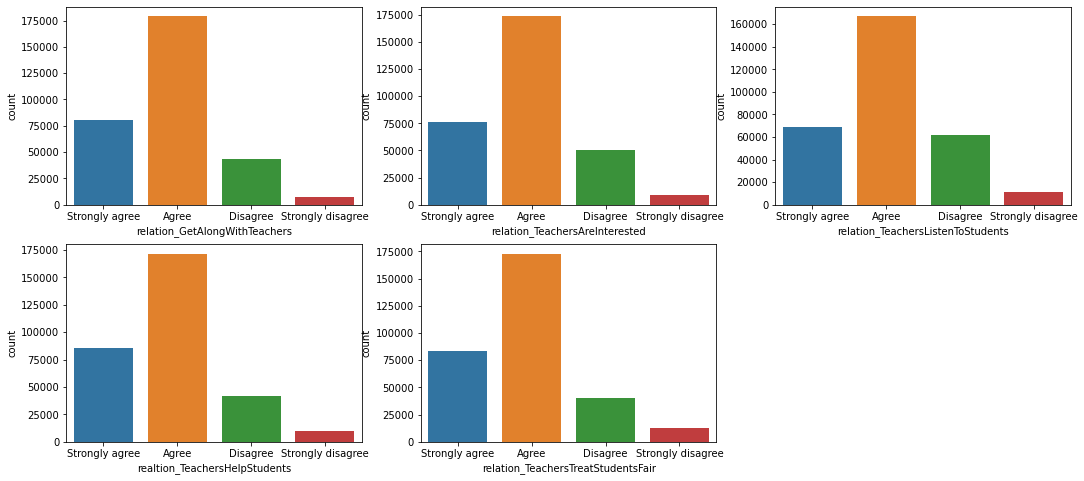

In [21]:
# Student Teachter Relation
plt.figure(figsize = [18,8])
plt.subplot(2,3,1)
sb.countplot(data = df_sub, x = 'relation_GetAlongWithTeachers');
plt.subplot(2,3,2)
sb.countplot(data = df_sub, x = 'relation_TeachersAreInterested');
plt.subplot(2,3,3)
sb.countplot(data = df_sub, x = 'relation_TeachersListenToStudents');
plt.subplot(2,3,4)
sb.countplot(data = df_sub, x = 'realtion_TeachersHelpStudents');
plt.subplot(2,3,5)
sb.countplot(data = df_sub, x = 'relation_TeachersTreatStudentsFair');

> Most of the stundents evaluate their relation to the teacher as very good or good, in the way of strongly agreeing or agreeing with the statements.

In [22]:
#melting the information about the teacher student realtion together
df_melt_relation = pd.melt(df_sub, id_vars = ['student_ID', 'score_maths', 'score_read', 'score_science', 'gender'], value_vars = ['relation_GetAlongWithTeachers','relation_TeachersAreInterested','relation_TeachersListenToStudents','realtion_TeachersHelpStudents','relation_TeachersTreatStudentsFair'])
df_melt_relation.head()

,student_ID,score_maths,score_read,score_science,gender,variable,value
0,1,406.8469,249.5762,341.7009,Female,relation_GetAlongWithTeachers,Agree
1,5,381.9209,311.7707,361.5628,Female,relation_GetAlongWithTeachers,Agree
2,6,396.3312,378.2544,384.3156,Female,relation_GetAlongWithTeachers,Agree
3,7,438.0823,373.2503,508.1499,Female,relation_GetAlongWithTeachers,Strongly agree
4,8,576.5773,567.7589,611.2831,Male,relation_GetAlongWithTeachers,Strongly agree


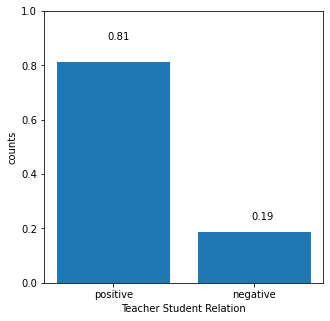

In [23]:
# positively rated relationships
positive = df_melt_relation.groupby('value').count().student_ID.Agree + df_melt_relation.groupby('value').count().student_ID['Strongly agree']
# negatively rated relationships
negative = df_melt_relation.groupby('value').count().student_ID.Disagree + df_melt_relation.groupby('value').count().student_ID['Strongly disagree']
fig = plt.figure(figsize = [5,5])
plt.bar(x = ['positive', 'negative'], height = [positive/len(df_melt_relation), negative/len(df_melt_relation)])
fig.text(0.3,0.8,'{:.2f}'.format(positive/len(df_melt_relation)))
fig.text(0.7,0.3,'{:.2f}'.format(negative/len(df_melt_relation)))
plt.xlabel('Teacher Student Relation')
plt.ylabel('counts')
plt.ylim([0,1]);

> 81% of the stundents see their relationship to the teacher positive and 19% negative.

### Distributions of variables of interest
- The distribution over the countries is wide and allows a general representative investigation.
- The male and female students are alost equaly represented.
- The scores are normally distrubuted as expected.
- There are much more stundents with a positive realtionship to their teacher than negative.
- The student teacher relation is obviously more complex and needs further investigation to extract trends or correlations.

## Bivariate Exploration

Let's combine variables and find correlations and trends.

### Corrleation between gender and scoring

#### Are boys or girls better in specific subjects?

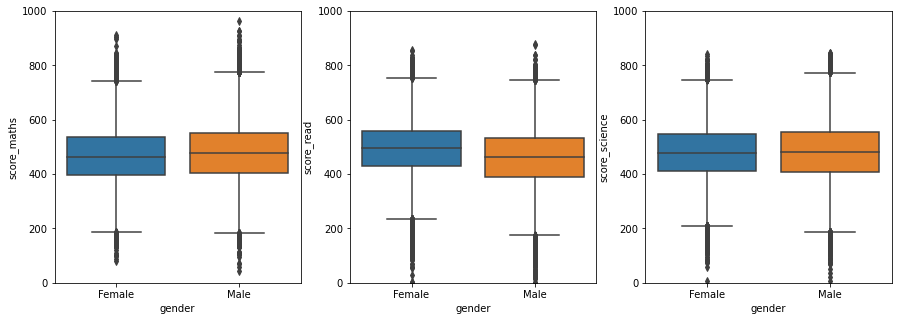

In [24]:
plt.figure(figsize = [15,5])
plt.subplot(1,3,1)
sb.boxplot(data = df_sub, x = 'gender', y = 'score_maths')
plt.ylim([0,1000])
plt.subplot(1,3,2)
sb.boxplot(data = df_sub, x = 'gender', y = 'score_read')
plt.ylim([0,1000])
plt.subplot(1,3,3)
sb.boxplot(data = df_sub, x = 'gender', y = 'score_science')
plt.ylim([0,1000]);

> Boys achieve slightly better results in maths and in science than girls. Girls are better in reading. Boys have a higher deviation in the maths scores than girls. 

In [25]:
#melting the information about the scores togehter
df_melt_scores = pd.melt(df_sub, id_vars = ['student_ID', 'gender'], value_vars = ['score_maths', 'score_read', 'score_science'])
df_melt_scores.head()

,student_ID,gender,variable,value
0,1,Female,score_maths,406.8469
1,5,Female,score_maths,381.9209
2,6,Female,score_maths,396.3312
3,7,Female,score_maths,438.0823
4,8,Male,score_maths,576.5773


##### Are boys or girls in general better?

<AxesSubplot:xlabel='gender', ylabel='value'>

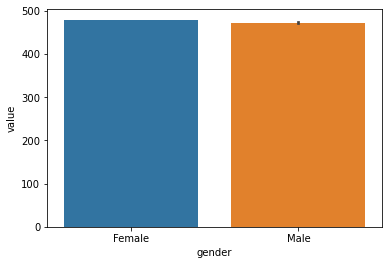

In [26]:
sb.barplot(data = df_melt_scores, x = 'gender', y = 'value')

> The scoring for male and female stundents in maths, reading and science combined are almost equal. There is no practically significant difference.

In [27]:
df_melt_scores.groupby('gender').mean()

,student_ID,value
gender,,
Female,6147.435255,479.403865
Male,6187.155102,473.097314


> Girls are slightly better than boys. If we consider a scoring of 1000 as maximum, girls have 0.6% higher scoring. That is a practically insignificant difference.

### Correlation teacher relation and scoring

##### How does the relationship with the teacher correlates with the scores in the different subjects?

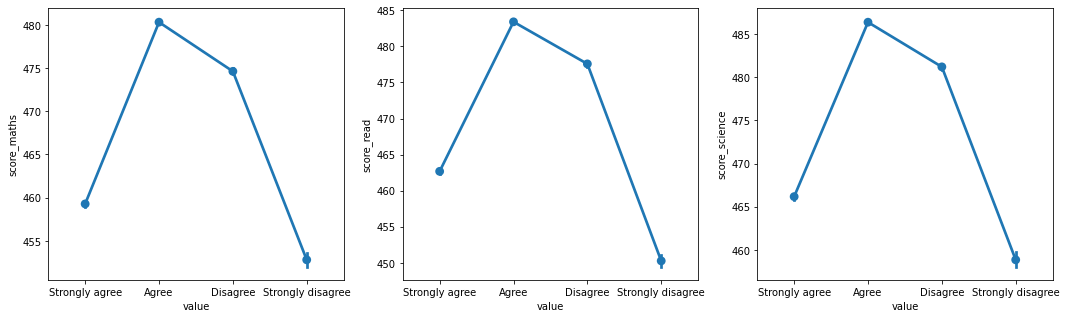

In [28]:
plt.figure(figsize = [18,5])
plt.subplot(1,3,1)
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_maths',  order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);
plt.subplot(1,3,2)
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_read', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);
plt.subplot(1,3,3)
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_science', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);



> If we consider an agreement with the statements as a good teacher student relation, we can summarize that with very good relations decreases the score, as well as bad relations. Just good realtions correlate with the highest average score. What causality and what just correlation in this case is, is not clear. The y-axes do not cover the full scoring range. The influence is much smaller than the graphs suggest. Since the trend is similar for all subjects, I will plot the correlation of the mean of the scores of all the subjects together againt the rating.

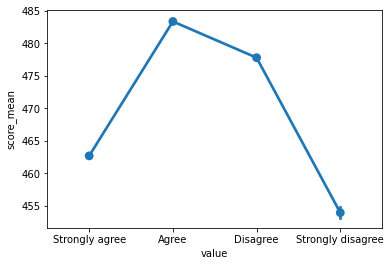

In [29]:
df_melt_relation['score_mean'] = (df_melt_relation.score_maths + df_melt_relation.score_read + df_melt_relation.score_science)/3
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_mean',  order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);

> The correlation of the mean of the scores of all the subjects together againt the rating looks as expected after the privious plot.

(0.0, 1000.0)

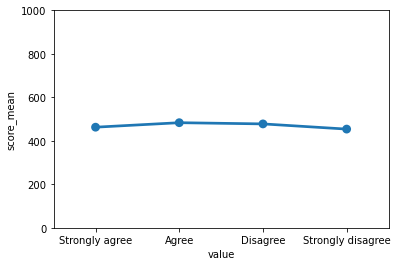

In [30]:
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_mean',  order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);
plt.ylim((0,1000))

> The influence of relationship is much smaller than the first graphs suggested.

#### How are the mean scores distributed for the different relationship ratings?

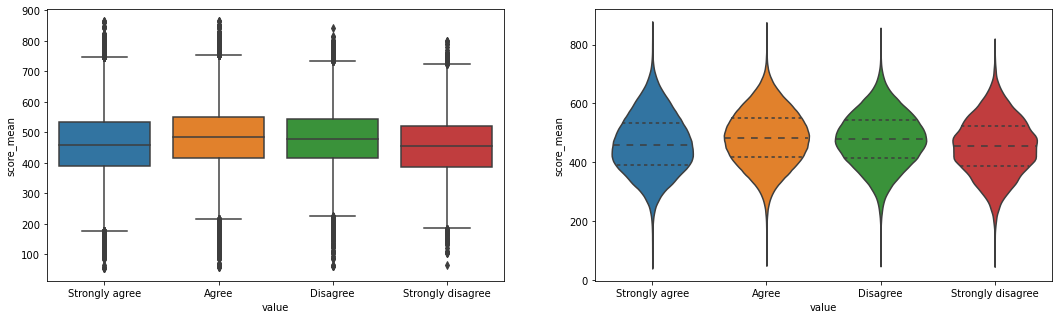

In [31]:
plt.figure(figsize = [18,5])
plt.subplot(1,2,1)
sb.boxplot(data = df_melt_relation, x = 'value', y = 'score_mean', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);
plt.subplot(1,2,2)
sb.violinplot(data = df_melt_relation, x = 'value', y = 'score_mean', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree'], inner ='quartile');

> These two plots support the previous observation. It can be seen that the differences in scoring is very small. In general, the relationship between teacher and student does not have a big impact on the scoring.

### Correlation teacher relation and gender

##### Do male and female students rate the relationship to their teachers differently?

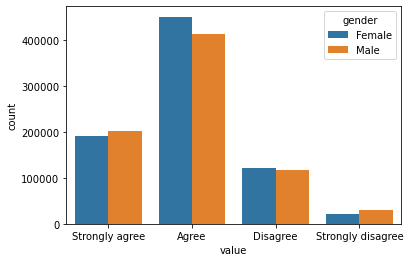

In [32]:
sb.countplot(data = df_melt_relation, x = 'value', hue = 'gender', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);

> Boys more often rate the statements as strongly agree/disagree. In this sense boys have more intense/extrem relation to their teachers than girls in a positive and in a negative way. We have slightly more girls in the data set, so a relative plot is better here.

#### Do boys rate the relationship to their teachers more extreme?

In [33]:
# female students reating the relationship as extremely
female_extreme = (df_melt_relation.groupby(['gender', 'value']).count().student_ID.Female['Strongly agree'] + df_melt_relation.groupby(['gender', 'value']).count().student_ID.Female['Strongly disagree'])/sum(df_melt_relation['gender'] == 'Female')
# male students reating the relationship as extremely
male_extreme = (df_melt_relation.groupby(['gender', 'value']).count().student_ID.Male['Strongly agree'] + df_melt_relation.groupby(['gender', 'value']).count().student_ID.Male['Strongly disagree'])/sum(df_melt_relation['gender'] == 'Male')
# female students reating the relationship not extreme
female_moderate = (df_melt_relation.groupby(['gender', 'value']).count().student_ID.Female['Agree'] + df_melt_relation.groupby(['gender', 'value']).count().student_ID.Female['Disagree'])/sum(df_melt_relation['gender'] == 'Female')
# male students reating the relationship not extreme
male_moderate = (df_melt_relation.groupby(['gender', 'value']).count().student_ID.Male['Agree'] + df_melt_relation.groupby(['gender', 'value']).count().student_ID.Male['Disagree'])/sum(df_melt_relation['gender'] == 'Male')

In [34]:
print(male_extreme, female_extreme)

0.30410696352501787 0.27083264318022554


<BarContainer object of 2 artists>

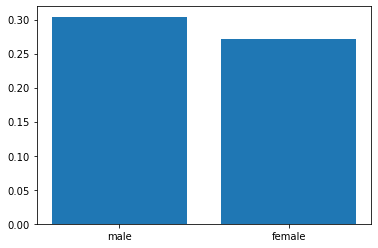

In [35]:
plt.bar(x = ['male', 'female'], height = [male_extreme, female_extreme])

> This plot shows, that 30% of the boys rate the relationship to the teacher as strongly positive oder strongly negative, while only 27% of the girls reate the relationship to the teacher as strongly positive oder strongly negative.

#### Do girls rate the relationship to their teachers more positive?

In [36]:
# number of female students
fem_total = df_melt_relation.groupby('gender').count().student_ID.Female
# number of male students
mal_total = df_melt_relation.groupby('gender').count().student_ID.Male
# percentage of female students rating the relationship as positive
fem_pos = (df_melt_relation.groupby(['value','gender']).count().student_ID.Agree.Female +df_melt_relation.groupby(['value','gender']).count().student_ID['Strongly agree'].Female)/fem_total
# percentage of female students rating the relationship as negative
fem_neg = (df_melt_relation.groupby(['value','gender']).count().student_ID.Disagree.Female +df_melt_relation.groupby(['value','gender']).count().student_ID['Strongly disagree'].Female)/fem_total
# percentage of male students rating the relationship as positive
mal_pos = (df_melt_relation.groupby(['value','gender']).count().student_ID.Agree.Male +df_melt_relation.groupby(['value','gender']).count().student_ID['Strongly agree'].Male)/mal_total
# percentage of male students rating the relationship as negative
mal_neg = (df_melt_relation.groupby(['value','gender']).count().student_ID.Disagree.Male +df_melt_relation.groupby(['value','gender']).count().student_ID['Strongly disagree'].Male)/mal_total

In [37]:
print('Girls with positive relation to teacher:', fem_pos, '%')
print('Boys with positive relation to teacher:', mal_pos, '%')
print('Girls with negative relation to teacher:', fem_neg, '%')
print('Boys with negative relation to teacher:', mal_neg, '%')

Girls with positive relation to teacher: 0.8181142893546538 %
Boys with positive relation to teacher: 0.8089582608581499 %
Girls with negative relation to teacher: 0.18188571064534625 %
Boys with negative relation to teacher: 0.19104173914185008 %


<AxesSubplot:>

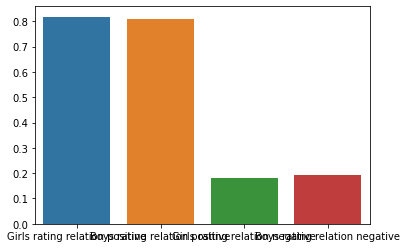

In [38]:
sb.barplot(x = ['Girls rating relation positive', 'Boys rating relation positive', 'Girls rating relation negative', 'Boys rating relation negative'], y = [fem_pos, mal_pos, fem_neg, mal_neg] )

The difference between girls and boy rating the relationship to their teachers as positive or negative is practically insignificant with 1% difference.

### Correlation of variables of interest 

I invested the correlations between gender, scores and the relationship with the following results:

- Boys achieve slightly better results in maths and in science than girls. 
- Boys have a higher deviation in the maths scores than girls.
- Girls are better in reading. 
- The scoring for male and female stundents in maths, reading and science combined are almost equal. There is no practically significant difference (Girls are slightly better than boys. If we consider a scoring of 1000 as maximum, girls have 0.6% higher scoring. That is a practically insignificant difference.)


- If we consider an agreement with the statements as a good teacher student relation, we can summarize that with very good relations decreases the score, as well as bad relations. Just good realtions correlate with the highest average score. (What causality and what just correlation in this case is, is not clear.)
- It can be seen that the differences in scoring is very small. In general, the relationship between teacher and student does not have a big impact on the scoring. (A hypothesis test would be interesting.)

- Boys more often rate the statements as strongly agree/disagree. In this sense boys have more intense/extrem relation to their teachers than girls in a positive and in a negative way. 30% of the boys rate the relationship to the teacher as strongly positive oder strongly negative, while only 27% of the girls reate the relationship to the teacher as strongly positive oder strongly negative.
- The difference between girls and boy rating the relationship to their teachers as positive or negative is practically insignificant with 1% difference.

## Multivariate Exploration

Let's investigate the data even further.

#### How is the score distributed over the agreementes with the statements?

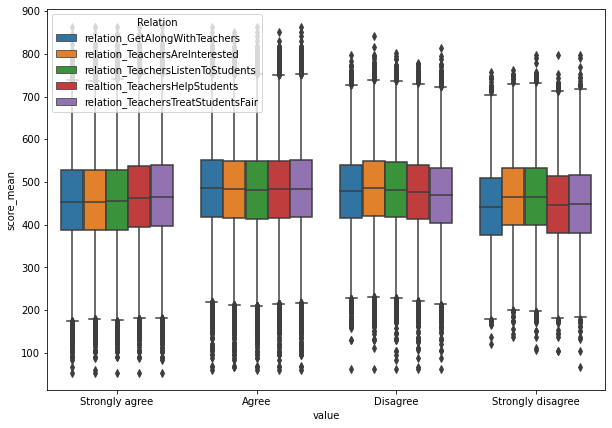

In [39]:
plt.figure(figsize = [10,7])
sb.boxplot(data = df_melt_relation, x = 'value', y = 'score_mean', hue = 'variable', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);
plt.legend(title='Relation', loc='upper left')

> Independent of the statements, with increasing agreement the spread of the scores decrease.

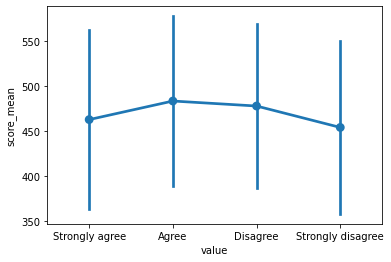

In [40]:
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_mean', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree'], ci="sd");

> There is no significant difference in the standard deviation of the scores considering the agreement to the statements.

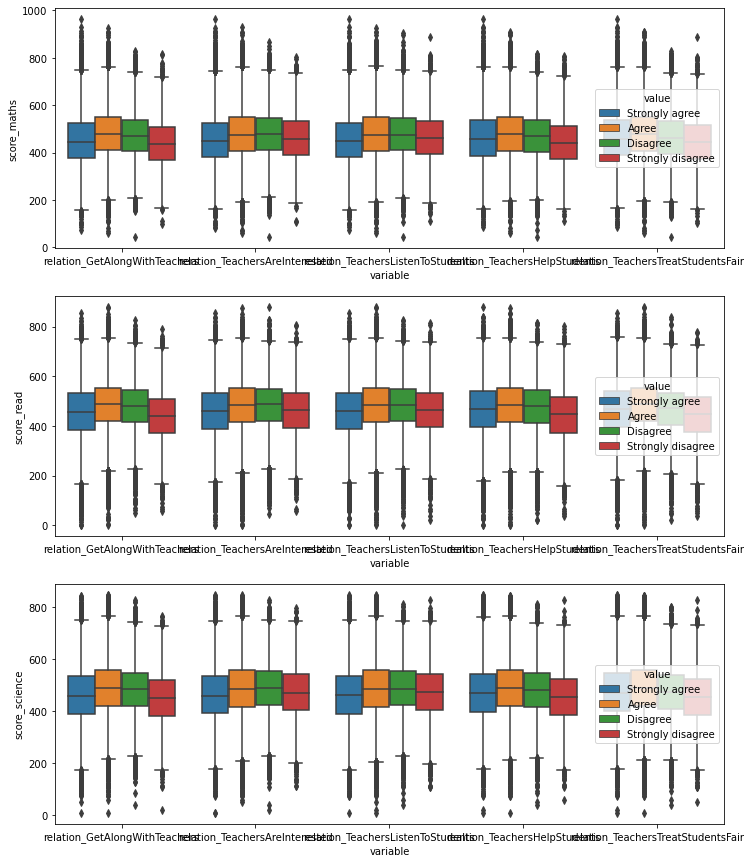

In [41]:
plt.figure(figsize = [12,15])
plt.subplot(3,1,1)
sb.boxplot(data = df_melt_relation, x = 'variable', y = 'score_maths', hue = 'value', hue_order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);
plt.subplot(3,1,2)
sb.boxplot(data = df_melt_relation, x = 'variable', y = 'score_read', hue = 'value', hue_order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);
plt.subplot(3,1,3)
sb.boxplot(data = df_melt_relation, x = 'variable', y = 'score_science', hue = 'value', hue_order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);

> For all subjects, the deviation in the scores tend to slightly degreas with disagreement with the statements.

#### Do students with a positve relationship to the teacher have higher scores?

In [42]:
df_melt_relation['relation_positive'] = df_melt_relation.value.isin(['Agree','Strongly agree'])

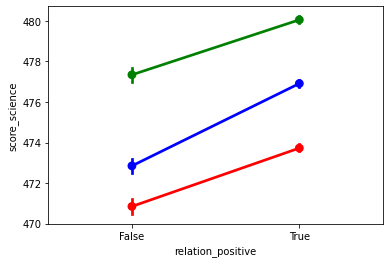

In [43]:
plt.figure()
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_maths', color = 'red');
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_read', color = 'blue');
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_science', color = 'green');

In [44]:
df_melt_relation.groupby(['relation_positive']).mean()

,student_ID,score_maths,score_read,score_science,score_mean
relation_positive,,,,,
False,6184.018132,470.846692,472.847690,477.341993,473.678792
True,6163.099476,473.725667,476.911805,480.055502,476.897658


> On average a student has in maths 3 points, in reading 4 points and in science 4 points more in a positive teacher relation than in a negative teacher relation.

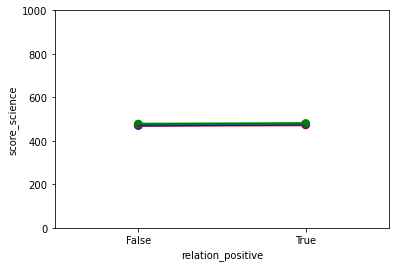

In [45]:
plt.figure()
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_maths', color = 'red')
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_read', color = 'blue')
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_science', color = 'green')
plt.ylim([0,1000]);

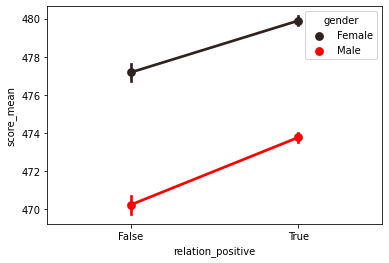

In [46]:
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_mean', color = 'red', hue = 'gender');

In [47]:
df_melt_relation.groupby(['relation_positive','gender']).mean()

student_ID  score_maths  score_read  score_science  \
relation_positive gender                                                        
False             Female  6089.383060   463.870007  491.262562     476.423229   
                  Male    6276.849293   477.690388  454.783838     478.243244   
True              Female  6160.341599   467.338522  493.455768     478.897042   
                  Male    6165.973127   480.380942  459.673332     481.262595   

                          score_mean  
relation_positive gender              
False             Female  477.185266  
                  Male    470.239157  
True              Female  479.897111  
                  Male    473.772290

> Girls achieve 3 points and boys 4 points more with a positive than with a negative teacher relationship.

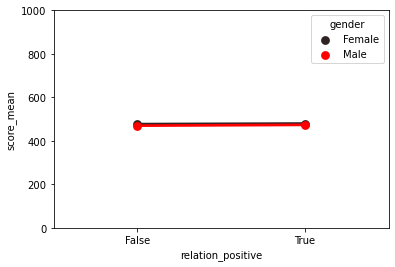

In [48]:
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_mean', color = 'red', hue = 'gender')
plt.ylim([0,1000]);

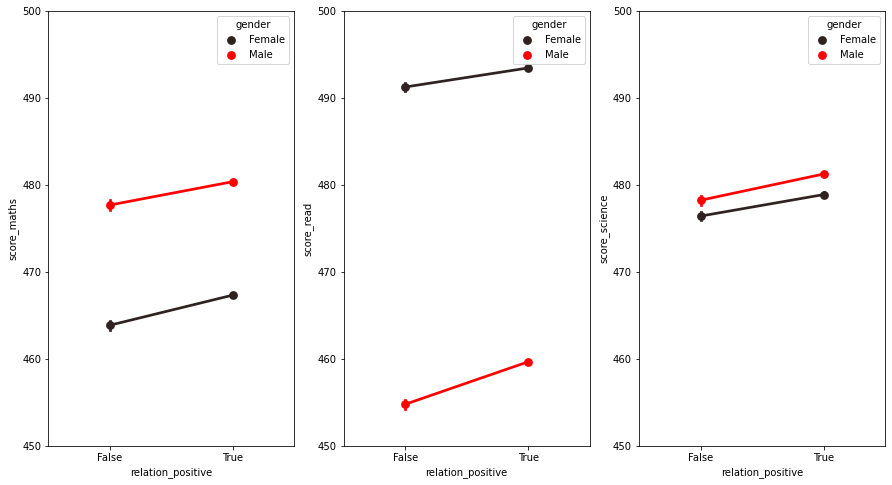

In [49]:
plt.figure(figsize= [15,8])
plt.subplot(1,3,1)
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_maths', color = 'red', hue = 'gender')
plt.ylim([450,500]);
plt.subplot(1,3,2)
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_read', color = 'red', hue = 'gender');
plt.ylim([450,500]);
plt.subplot(1,3,3)
sb.pointplot(data = df_melt_relation, x = 'relation_positive', y = 'score_science', color = 'red', hue = 'gender');
plt.ylim([450,500]);

> For positive relationships, the scores are slightly higher and the confidence intervals smaller. Therefore, the students are better on average with a lower uncertainty than students with a negative relationship to the teacher. That is true for male and female students and for all subjects.

Increase by positive relation male:
- maths: 2.7 points
- reading: 4.9 points
- science: 3 points
- mean: 3.5 points

Increase by positive relation female:
- maths: 3.5 points
- reading: 2.2 points
- science: 2.5 points
- mean: 2.7 points

#### How do the scores for maths, reading and science correlate which each other? 

<AxesSubplot:>

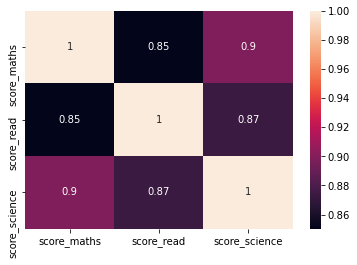

In [50]:
sb.heatmap(df_sub[['score_maths','score_read','score_science']].corr(), annot = True)

> In general, the scoring correlates with each other. Especially, there is a very strong correlation between the scores in maths and science. That means, if a student is good in one subject, the student is probably also good in the other subjects. Especially those students who are good in maths are also good in science and vice versa.

#### How does the teacher student relationship influences the scores.

<AxesSubplot:xlabel='value', ylabel='score_science'>

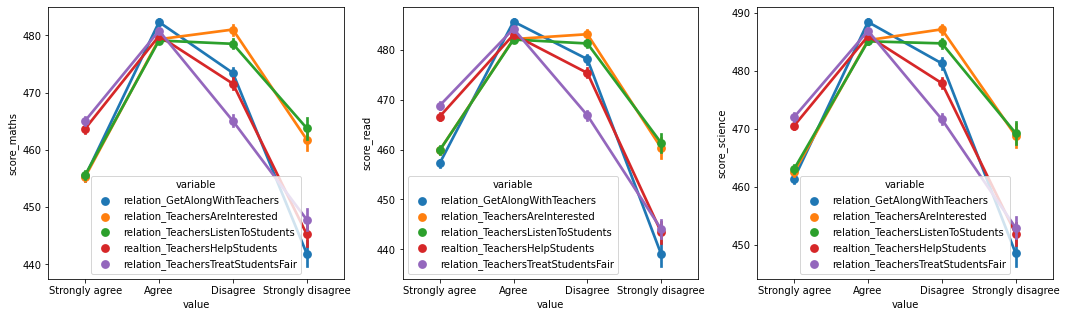

In [51]:
plt.figure(figsize =[18,5])
plt.subplot(1,3,1)
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_maths', hue = 'variable', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree'])
plt.subplot(1,3,2)
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_read', hue = 'variable', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree'])
plt.subplot(1,3,3)
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_science', hue = 'variable', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree'])

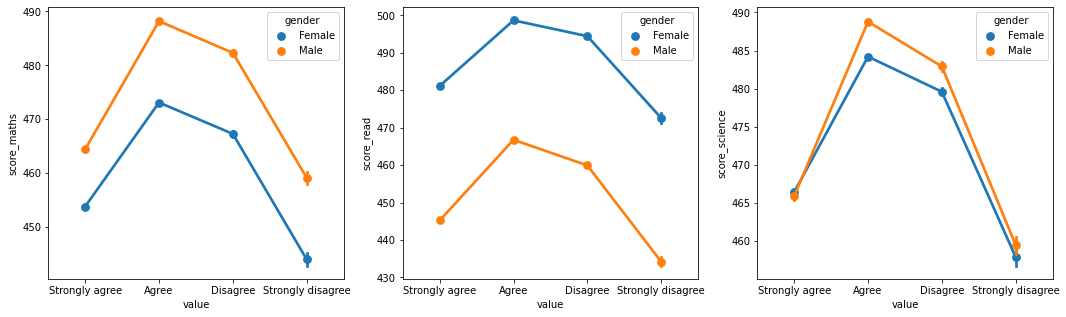

In [52]:
plt.figure(figsize = [18,5])
plt.subplot(1,3,1)
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_maths', hue = 'gender', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);
plt.subplot(1,3,2)
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_read', hue = 'gender', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);
plt.subplot(1,3,3)
sb.pointplot(data = df_melt_relation, x = 'value', y = 'score_science', hue = 'gender', order = ['Strongly agree', 'Agree','Disagree', 'Strongly disagree']);

> Independent of the statement, the subject and the gender, the best results are achieves if the statements are rated as "Agree" or "Disagree". With disagreement the score range is wider than with agreement. If teachers are rated as unfair, not helping and not getting along with, the students achieve the lowest results. Compared to this, teachers not listing and not being interested has a lower effect on the student's scores.
> It is surprising, that if student strongly agree with the statements and therefore, have a very good relationship to the teacher, the students have worse results. That is surprising.

#### Does the relationship between student and teacher have effect on the scoring in the different subject?

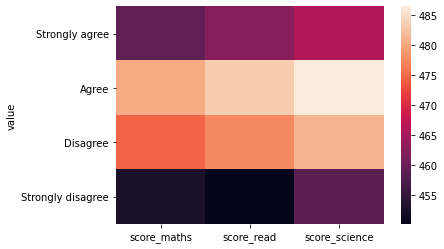

In [53]:
df_heatmap = df_melt_relation[['score_maths','score_read', 'score_science', 'gender', 'variable', 'value']].groupby('value', sort = True).mean()
df_heatmap = df_heatmap.reindex(index = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'])
sb.heatmap(df_heatmap);

Yes, but the effect is not big, we are talking about effects in the range of 5%. There are no big differences observable. The best results are achieved, when students agree with the statements and the highest scoring are in science, then reading and the worst results are achieved in maths.

#### Is it true, that boys are better in maths and science and girls are better with languages?

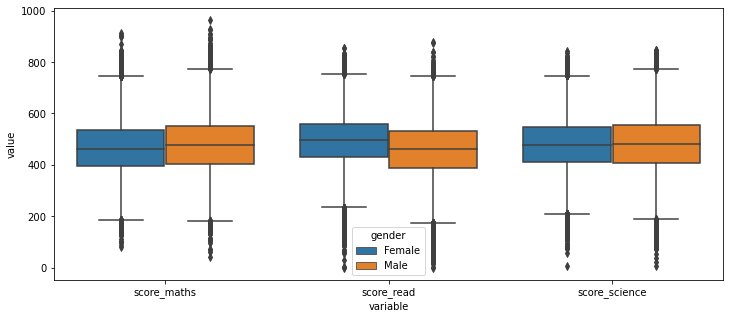

In [54]:
plt.figure(figsize = [12,5])
sb.boxplot(data = df_melt_scores, x = 'variable', y = 'value', hue = 'gender');
# girls are best in Reading, boys are best in maths and science

In [55]:
df_melt_scores.groupby(['gender', 'variable']).mean()

student_ID       value
gender variable                              
Female score_maths    6147.435255  466.707649
       score_read     6147.435255  493.056855
       score_science  6147.435255  478.447091
Male   score_maths    6187.155102  479.866934
       score_read     6187.155102  458.739235
       score_science  6187.155102  480.685772

Yes, it is. But the difference is marginal. There are no big differences, but it is interesting, that girls have on average a lower score in maths (-13 points) and at the same time a smaller deviation. They do not have as high scores as boys, but they also do not have as low scores as boys. 

Girls have on average 2 points less in science and 45 points more in reading.

### Summary: How does the teacher student relationship influence the student’s success?

With a positive teacher student relationship the scores are on average higher in each subject independent of the gender.

In those subjects the students are worse, the relationship has the highest impact. (Boys are better in maths, girls are better in reading, boys are slightly better in science.) In general, for boys the relationship has a higher impact on the results. But these effects are much smaller than the score difference caused by the subjects itself.

I would have assumed, that a very good relationship between teacher and student would further increase the student’s score. That is not true. A very good relationship between the teacher and the student correlated with a decreased score for all subjects and independent from the gender.


We have to be careful and distinguish between causality and correlation. A possible explanation why a very good student teacher relationship seems to decrease the success of the students could be the school types. For the school types with students who have learning deficits could have a in general a stronger focus on a good student teacher relationship but lower scores per definition.

Independent of the statement, the subject and the gender, the best results are achieves if the statements are rated as "Agree" or "Disagree". With disagreement the score range is wider than with agreement. If teachers are rated as unfair, not helping and not getting along with, the students achieve the lowest results. Compared to this, teachers not listing and not being interested has a lower effect on the student's scores. It is surprising, that if student strongly agree with the statements and therefore have a very good relationship to the teacher, the students have worse results. That is surprising.



### Furhter insights

It is true, boys are better in maths and girls are better in reading. In science the difference is smaller, but boys are slightly better.

There is a very strong correlation between the scores in maths and science. That means, if a student is good in one subject, the student is probably also good in the other subjects. Especially those students who are good in maths are also good in science and vice versa. 


For me it is surprising, that the teacher student relation has an marginal impact on the results in school. Different reason: Very subjective, an effect, to learn now. it would be intersting to see how happy those students are and if they like studing besides school.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## Hypothesis testing

Are the scores achieved by the students depending on the relationship to the teacher significantly different?

In [64]:
# extract columns of interest for the hypothesis test
sample_data = df_melt_relation[['score_mean', 'relation_positive']]

In [75]:
# mean score
score_mean_total_observe = sample_data.score_mean.mean()
# mean score of students rating the student teacher relationship as positive
score_mean_positive_diff_observe = sample_data.groupby('relation_positive').mean().score_mean[1] - score_mean_total_observe
# mean score of students rating the student teacher relationship as negative
score_mean_negative_diff_observe = sample_data.groupby('relation_positive').mean().score_mean[0] - score_mean_total_observe

In [78]:
# bootstrapping
score_mean_totales, score_mean_positive_diffs, score_mean_negative_diffs = [], [], []

for _ in range(10000):
    if _%100 == 0:
        print(_)
    bootsample = sample_data.sample(len(sample_data),replace = True)
    score_mean_total = bootsample.score_mean.mean()
    score_mean_totales.append(score_mean_total)
    score_mean_positive_diffs.append(bootsample.groupby('relation_positive').mean().score_mean[1] - score_mean_total)
    score_mean_negative_diffs.append(bootsample.groupby('relation_positive').mean().score_mean[0] - score_mean_total)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


##### Agree
$$H_0: \mu_{positive} - \mu_{all} \leq 0$$ 


$$H_1: \mu_{positive} - \mu_{all} > 0$$

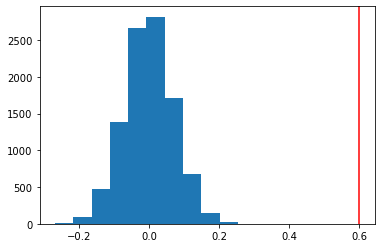

In [80]:
null_vals = np.random.normal(0, np.std(score_mean_agree_diff), 10000)
plt.hist(null_vals);
plt.axvline(score_mean_positive_diff_observe, color = 'red');

In [82]:
(null_vals > score_mean_positive_diff_observe).mean()

0.0

With a observed p-value of 0%, I have to reject the H_0 hypothesis. Therefore, I assume the difference in the observed scoring for the students with a positive student teacher relationship is significantly higher than the average. I assume the student teacher relationship has a significantly positive impact on the scores.